In [59]:
import numpy as np
import pandas as pd
from lightgbm import LGBMClassifier
import warnings
warnings.filterwarnings('ignore')

In [60]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [61]:
pd.options.display.max_rows = 70
# train.head().T

In [62]:
def resumetable(df):
    print(f'데이터셋 형상: {df.shape}')
    summary = pd.DataFrame(df.dtypes, columns=['데이터 타입'])
    summary = summary.reset_index()
    summary = summary.rename(columns={'index': '피처'})
    summary['결측값 개수'] = df.isnull().sum().values
    summary['고윳값 개수'] = df.nunique().values
    summary['첫 번째 값'] = df.loc[0].values
    summary['두 번째 값'] = df.loc[1].values
    summary['세 번째 값'] = df.loc[2].values
    return summary

resumetable(train)

데이터셋 형상: (15000, 70)


,피처,데이터 타입,결측값 개수,고윳값 개수,첫 번째 값,두 번째 값,세 번째 값
0,index,int64,0,15000,0,1,2
1,Q1,float64,41,5,1.0,4.0,4.0
2,Q2,float64,69,5,5.0,4.0,5.0
3,Q3,float64,50,5,5.0,4.0,5.0
4,Q4,float64,71,5,5.0,4.0,4.0
5,Q5,float64,38,5,1.0,4.0,3.0
6,Q6,float64,48,5,4.0,5.0,5.0
7,Q7,float64,76,5,5.0,4.0,5.0
8,Q8,float64,48,5,5.0,4.0,5.0
9,Q9,float64,56,5,1.0,3.0,4.0


In [63]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 70 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         15000 non-null  int64  
 1   Q1            14959 non-null  float64
 2   Q2            14931 non-null  float64
 3   Q3            14950 non-null  float64
 4   Q4            14929 non-null  float64
 5   Q5            14962 non-null  float64
 6   Q6            14952 non-null  float64
 7   Q7            14924 non-null  float64
 8   Q8            14952 non-null  float64
 9   Q9            14944 non-null  float64
 10  Q10           14928 non-null  float64
 11  Q11           14941 non-null  float64
 12  Q12           14933 non-null  float64
 13  Q13           14960 non-null  float64
 14  Q14           14964 non-null  float64
 15  Q15           14955 non-null  float64
 16  Q16           14967 non-null  float64
 17  Q17           14963 non-null  float64
 18  Q18           14937 non-nu

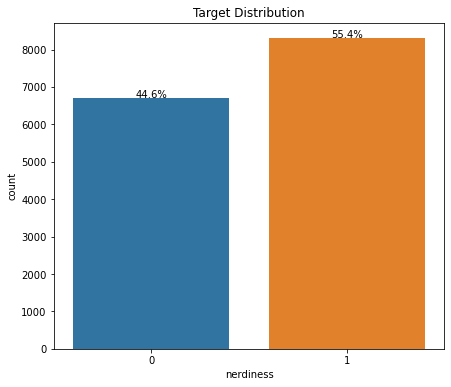

In [64]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# 타깃값 비율 표시
def write_percent(ax, total_size):
	
	for patch in ax.patches:
		height = patch.get_height() 
		width = patch.get_width()
		left_coord = patch.get_x() 
		percent = height/total_size*100 

		ax.text(x=left_coord + width/2.0,
						y=height + total_size*0.001, 
						s=f'{percent:1.1f}%', 
						ha='center')

plt.figure(figsize=(7, 6))

ax = sns.countplot(x='nerdiness', data=train)
write_percent(ax, len(train))
ax.set_title('Target Distribution');

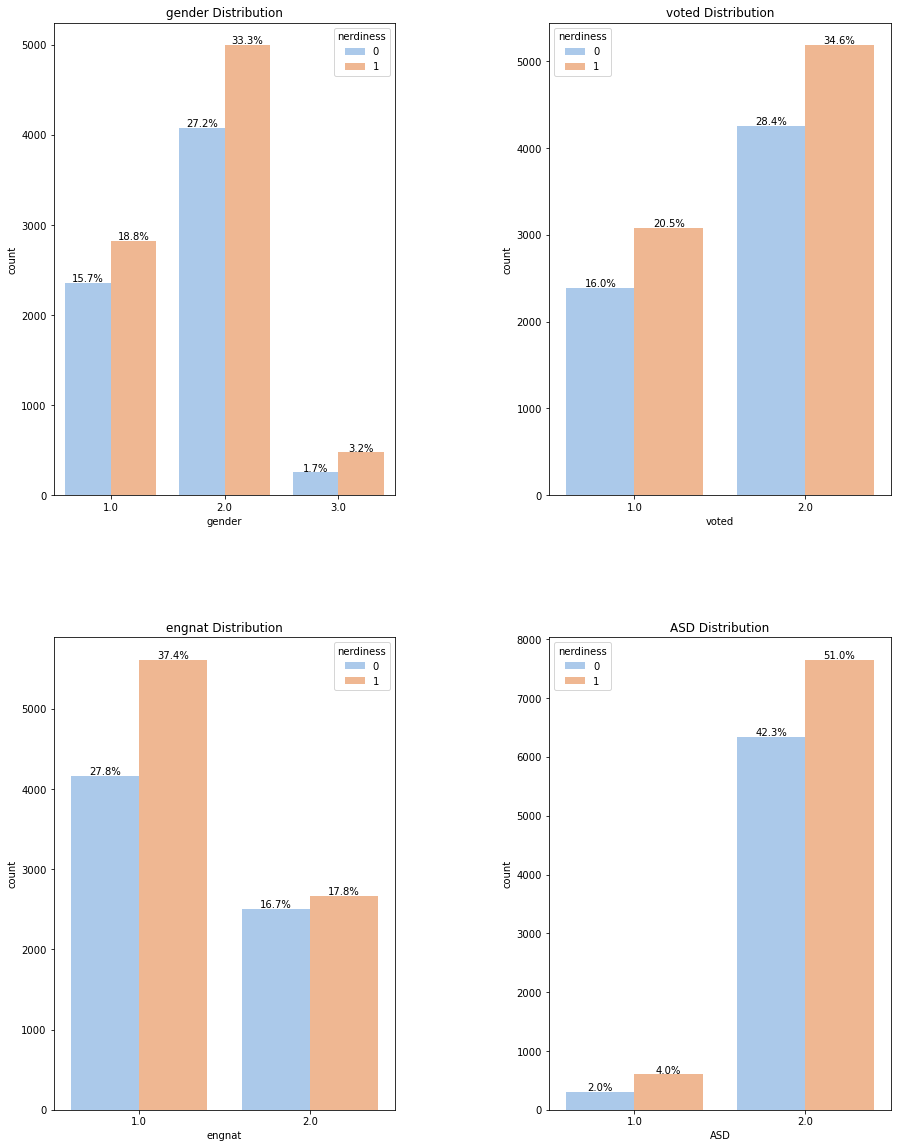

In [65]:
import matplotlib.gridspec as gridspec

def countplot_ratio(df, features, num_rows, num_cols, size=(15, 20)):
	plt.figure(figsize=size)
	grid = gridspec.GridSpec(num_rows, num_cols) 
	plt.subplots_adjust(wspace=0.45, hspace=0.3) 

	for idx, feature in enumerate(features): 
		ax = plt.subplot(grid[idx]) 
		sns.countplot(x=feature, data=df, hue='nerdiness', palette='pastel', ax=ax)
		write_percent(ax, len(df))
		ax.set_title(f'{feature} Distribution')

nom_features = ['gender', 'voted', 'engnat', 'ASD']
countplot_ratio(train, nom_features, num_rows=2, num_cols=2)

In [66]:
def get_crosstab(df, feature):
	crosstab = pd.crosstab(df[feature], df['nerdiness'])
	crosstab = crosstab.reset_index()
	return crosstab

crosstab = get_crosstab(train, 'urban')
crosstab

nerdiness,urban,0,1
0,0,39,43
1,1,1176,1528
2,2,2953,3935
3,3,2529,2797


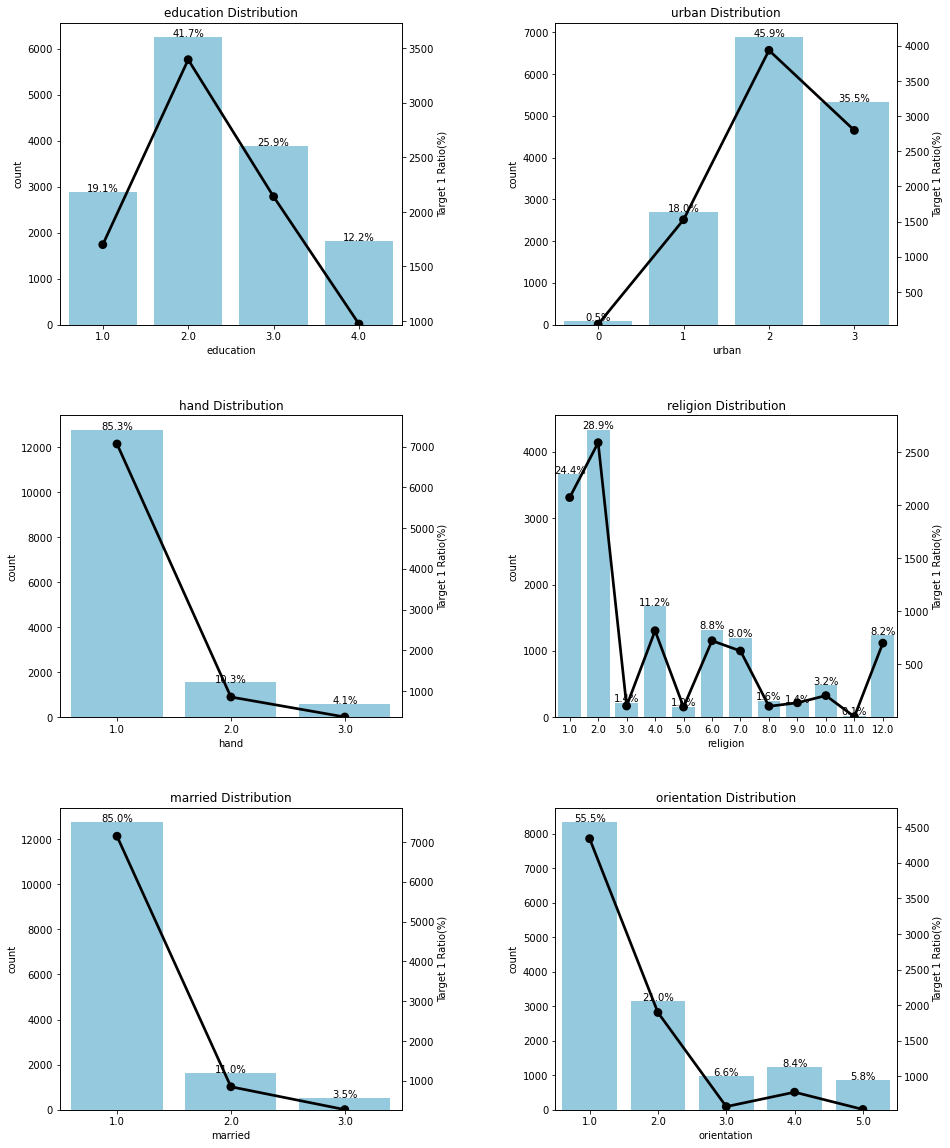

In [67]:
# 명목형, 순서형 피처 분포
# 카운트플롯 : 피처별 고윳값의 비율
# 꺾은 선 그래프 : 해당 고윳값 중 타깃값이 1의 비율
def plot_pointplot(ax, feature, crosstab):
    ax2 = ax.twinx()
    ax2 = sns.pointplot(x=feature, y=1, data=crosstab, order=crosstab[feature].values, color='black', legend=False)
    ax2.set_ylim(crosstab[1].min()-5, crosstab[1].max()*1.1)
    ax2.set_ylabel('Target 1 Ratio(%)')

def plot_ratio(df, features, num_rows, num_cols, size=(15, 20)):
	plt.figure(figsize=size)
	grid = gridspec.GridSpec(num_rows, num_cols) 
	plt.subplots_adjust(wspace=0.45, hspace=0.3) 

	for idx, feature in enumerate(features): 
		ax = plt.subplot(grid[idx])
		crosstab = get_crosstab(df, feature) 
		sns.countplot(x=feature, data=df, order=crosstab[feature].values, color='skyblue', ax=ax)
		write_percent(ax, len(df))
		plot_pointplot(ax, feature, crosstab)
		ax.set_title(f'{feature} Distribution')

nom_features = ['education', 'urban', 'hand', 'religion', 'married', 'orientation']
plot_ratio(train, nom_features, num_rows=3, num_cols=2)

<AxesSubplot:xlabel='ASD', ylabel='count'>

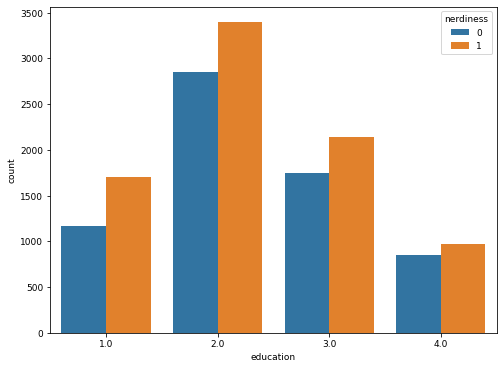

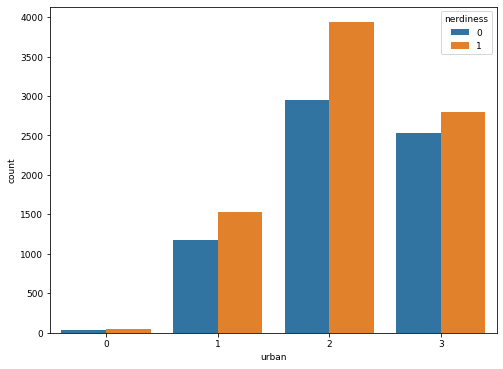

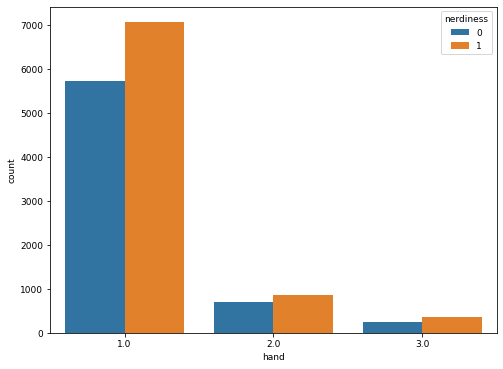

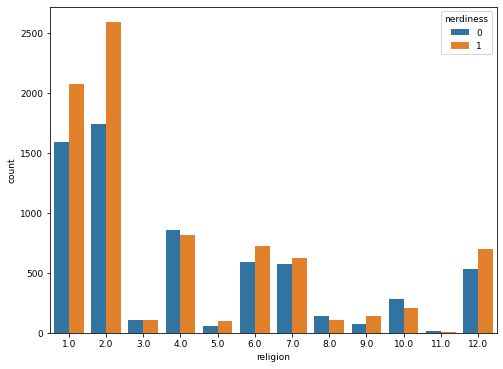

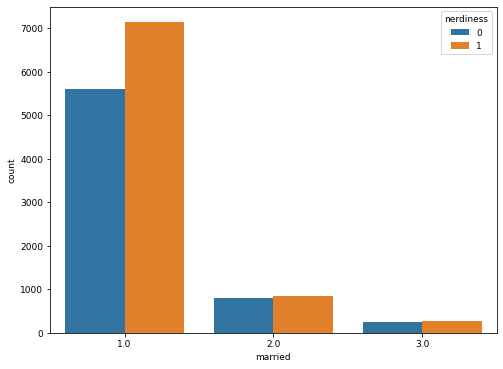

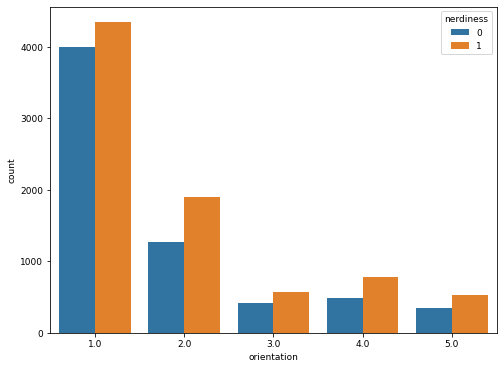

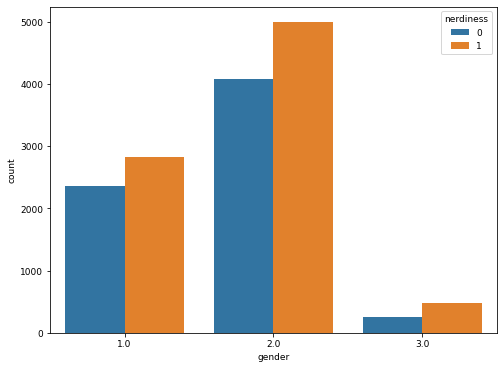

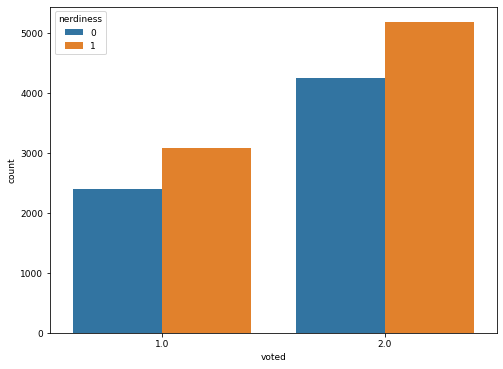

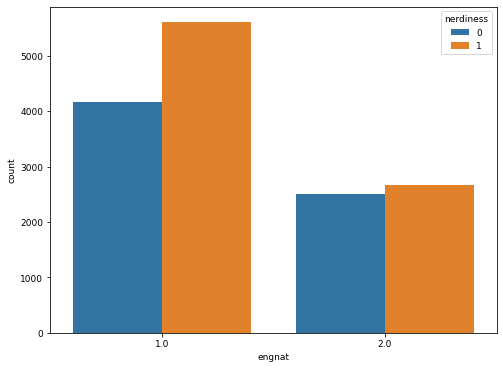

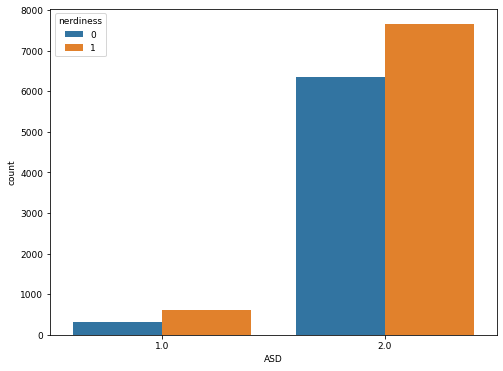

In [ ]:
# 범주형 데이터 (순서형, 명목형)
plt.figure(figsize =(8,6))
sns.countplot(data = train, x = 'education', hue = 'nerdiness')

plt.figure(figsize =(8,6))
sns.countplot(data = train, x = 'urban', hue = 'nerdiness')

plt.figure(figsize =(8,6))
sns.countplot(data = train, x = 'hand', hue = 'nerdiness')

plt.figure(figsize =(8,6))
sns.countplot(data = train, x = 'religion', hue = 'nerdiness')

plt.figure(figsize =(8,6))
sns.countplot(data = train, x = 'married', hue = 'nerdiness')

plt.figure(figsize =(8,6))
sns.countplot(data = train, x = 'orientation', hue = 'nerdiness')

plt.figure(figsize =(8,6))
sns.countplot(data = train, x = 'gender', hue = 'nerdiness')

plt.figure(figsize =(8,6))
sns.countplot(data = train, x = 'voted', hue = 'nerdiness')

plt.figure(figsize =(8,6))
sns.countplot(data = train, x = 'engnat', hue = 'nerdiness')

plt.figure(figsize =(8,6))
sns.countplot(data = train, x = 'ASD', hue = 'nerdiness')

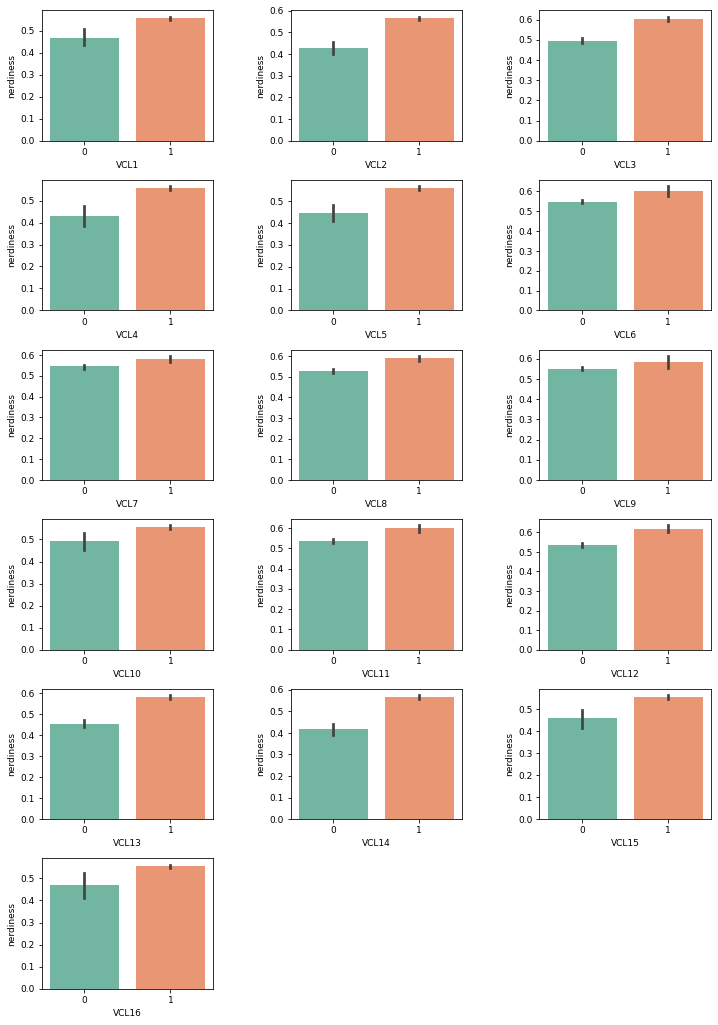

In [55]:
def barplot_ratio(df, features, num_rows, num_cols, size=(12, 18)):
	mpl.rc('font', size=9)
	plt.figure(figsize=size)
	grid = gridspec.GridSpec(num_rows, num_cols) 
	plt.subplots_adjust(wspace=0.45, hspace=0.3) 

	for idx, feature in enumerate(features): 
		ax = plt.subplot(grid[idx])
		sns.barplot(x=feature, y='nerdiness', data=df, palette='Set2', ax=ax)

V_features = ['VCL1', 'VCL2', 'VCL3', 'VCL4', 'VCL5', 'VCL6', 'VCL7', 'VCL8', 'VCL9', 'VCL10', 'VCL11', 'VCL12', 'VCL13', 'VCL14', 'VCL15', 'VCL16']  
barplot_ratio(train, V_features, num_rows=6, num_cols=3)

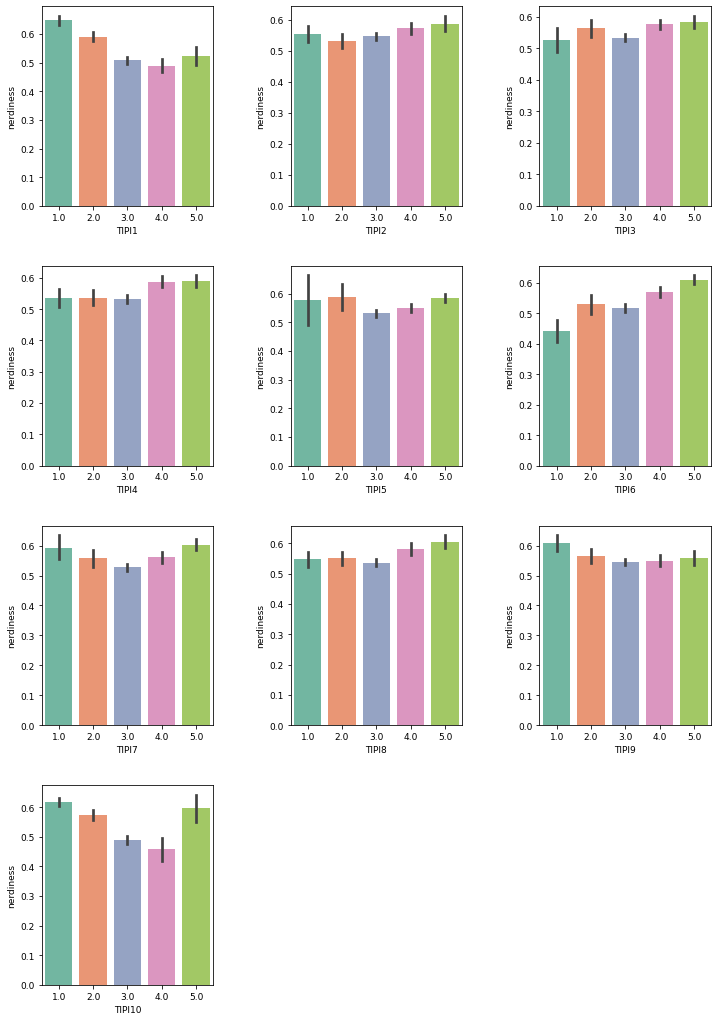

In [69]:
def barplot_ratio(df, features, num_rows, num_cols, size=(12, 18)):
	mpl.rc('font', size=9)
	plt.figure(figsize=size)
	grid = gridspec.GridSpec(num_rows, num_cols) 
	plt.subplots_adjust(wspace=0.45, hspace=0.3) 

	for idx, feature in enumerate(features): 
		ax = plt.subplot(grid[idx])
		sns.barplot(x=feature, y='nerdiness', data=df, palette='Set2', ax=ax)

V_features = ['TIPI1', 'TIPI2', 'TIPI3', 'TIPI4', 'TIPI5', 'TIPI6', 'TIPI7', 'TIPI8', 'TIPI9', 'TIPI10']  
barplot_ratio(train, V_features, num_rows=4, num_cols=3)

# 모델링 

In [ ]:
train = train.drop(['index', 'country'],axis = 1)
test = test.drop(['index', 'country'],axis = 1)

In [ ]:
#train을 target과 feature로 나눠줍니다.
train_x=train.drop(['nerdiness'], axis=1)
train_y=train['nerdiness']

In [ ]:
lgbm_clf = LGBMClassifier(
            n_estimators=1000
        )
lgbm_clf.fit(train_x, train_y)

lgbm_pred = lgbm_clf.predict(test)

# 제출 파일 생성

In [ ]:
submission = pd.read_csv('sample_submission.csv')

submission

,index,nerdiness
0,0,-1
1,1,-1
2,2,-1
3,3,-1
4,4,-1
...,...,...
35447,35447,-1
35448,35448,-1
35449,35449,-1
35450,35450,-1


In [ ]:
submission["nerdiness"] = lgbm_pred

In [ ]:
submission

,index,nerdiness
0,0,0
1,1,1
2,2,1
3,3,1
4,4,1
...,...,...
35447,35447,1
35448,35448,1
35449,35449,1
35450,35450,0


In [ ]:
submission.to_csv("baseline.csv", index = False)